In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (GridSearchCV, ParameterGrid,
                                     RandomizedSearchCV)
from sklearn.metrics import fbeta_score, make_scorer
from tools import (Modelisation, datasets, SearchCV, restauration_CV, 
                   graph_2scores_CV, graph_3scores_CV, graph_param_CV, 
                   best_score_CV)

t = time.time()

In [2]:
df = pd.read_csv('data/df_train_prepro.csv').sample(frac=1)
df.shape

(1610494, 48)

**Définition des variables quantitatives, des variables catégorielles et des datasets :**

In [3]:
datasets_df = datasets(df)
X_quant = datasets_df['X_quant']
X_cat = datasets_df['X_cat']
X = datasets_df['X']
y = datasets_df['y']

Columns_quant :


['contextid',
 'campaignctrlast24h',
 'dayssincelastvisitdouble',
 'ltf_nbglobaldisplay_4w',
 'ltf_nbpartnerdisplayssincelastclick',
 'ltf_nbpartnerdisplay_90d',
 'ltf_nbpartnerclick_90d',
 'ltf_nbpartnersales_90d',
 'nbdayssincelastclick',
 'nbdisplay_1hour',
 'nbdisplayglobalapprox_1d_sum_xdevice',
 'display_size',
 'zonecostineuro']


Columns_cat :


['display_env',
 'target_env',
 'campaignscenario',
 'campaignvertical',
 'is_interstitial',
 'device_type',
 'hour',
 'weekday']


Nombre de variables pour X_quant : 13



Index(['contextid', 'campaignctrlast24h', 'dayssincelastvisitdouble',
       'ltf_nbglobaldisplay_4w', 'ltf_nbpartnerdisplayssincelastclick',
       'ltf_nbpartnerdisplay_90d', 'ltf_nbpartnerclick_90d',
       'ltf_nbpartnersales_90d', 'nbdayssincelastclick', 'nbdisplay_1hour',
       'nbdisplayglobalapprox_1d_sum_xdevice', 'display_size',
       'zonecostineuro'],
      dtype='object')


Nombre de variables pour X_cat : 50



Index(['display_env_app_ios', 'display_env_other', 'display_env_web',
       'target_env_2', 'campaignscenario_5', 'campaignscenario_6',
       'campaignscenario_11', 'campaignscenario_12', 'campaignscenario_13',
       'campaignscenario_17', 'campaignvertical_20.0', 'campaignvertical_23.0',
       'campaignvertical_129.0', 'campaignvertical_200002.0',
       'is_interstitial_True', 'device_type_Desktop',
       'device_type_Desktop - Safari', 'device_type_Mobile - Other',
       'device_type_Unknown', 'device_type_iPad', 'device_type_iPhone',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')


Nombre de variables pour X : 63


# Decision tree
## Variables quantitatives

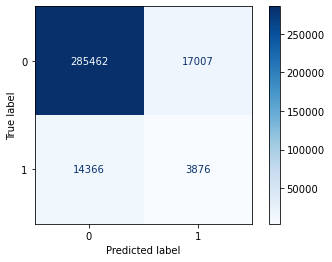

f1 : 0.1981
f3 : 0.2094
f5 : 0.2113
recall : 0.2125
negative predictive value : 0.9521
precision : 0.1856
roc_auc : 0.5781
training time : 17.12s
prediction time : 0.175s


In [4]:
m = Modelisation(X_quant, y, DecisionTreeClassifier())
m.show_conf_matrix()
m.show_metrics_score()

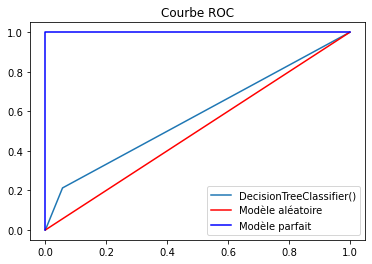

In [5]:
m.show_ROC()

In [6]:
m.show_attributes()

max_depth : 54
n_leaves : 91863
node_count : 183725


/home/headless/work/statapp/tools.py:168: RuntimeWarning: invalid value encountered in long_scalars
  Precision = TP / (TP + FP)


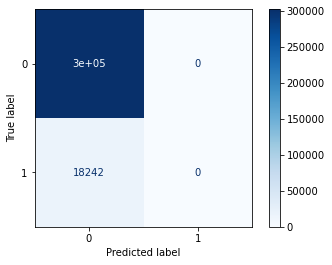

f1 : nan
f3 : nan
f5 : nan
recall : 0.0000
negative predictive value : 0.9431
precision : nan
roc_auc : 0.7327
training time : 2.027s
prediction time : 0.034s


In [7]:
m = Modelisation(X_quant, y, DecisionTreeClassifier(max_depth=2))
m.show_conf_matrix()
m.show_metrics_score()

In [8]:
m.show_attributes()

max_depth : 2
n_leaves : 4
node_count : 7


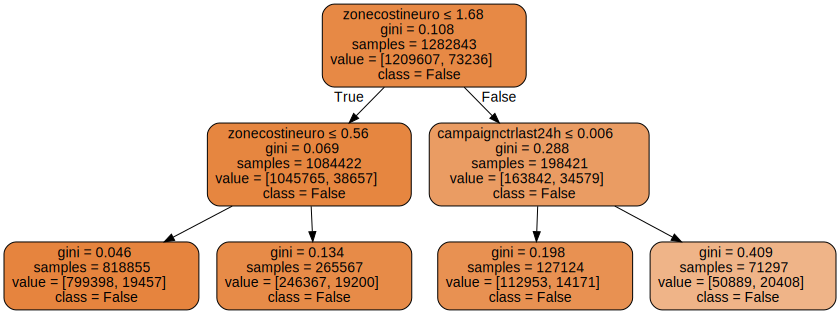

In [9]:
m.plot_tree()

## Variables catégorielles

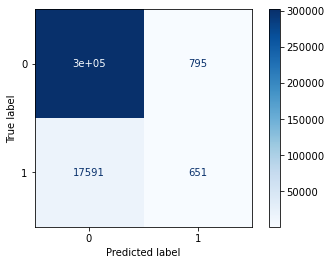

f1 : 0.0661
f3 : 0.0393
f5 : 0.0370
recall : 0.0357
negative predictive value : 0.9449
precision : 0.4502
roc_auc : 0.6578
training time : 11.878s
prediction time : 0.134s


In [10]:
m = Modelisation(X_cat, y, DecisionTreeClassifier())
m.show_conf_matrix()
m.show_metrics_score()

In [11]:
m.show_attributes()

max_depth : 47
n_leaves : 19793
node_count : 39585


## Variables quantitatives + catégorielles

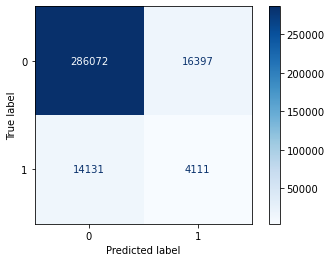

f1 : 0.2122
f3 : 0.2226
f5 : 0.2243
recall : 0.2254
negative predictive value : 0.9529
precision : 0.2005
roc_auc : 0.5856
training time : 34.483s
prediction time : 0.262s


In [12]:
m = Modelisation(X, y, DecisionTreeClassifier())
m.show_conf_matrix()
m.show_metrics_score()

In [13]:
m.show_attributes()

max_depth : 52
n_leaves : 87468
node_count : 174935


# Random Forest

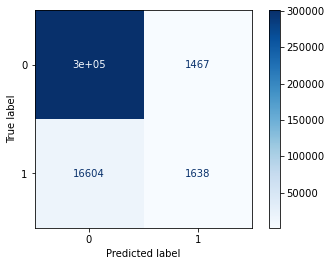

f1 : 0.1535
f3 : 0.0979
f5 : 0.0928
recall : 0.0898
negative predictive value : 0.9477
precision : 0.5275
roc_auc : 0.7367
training time : 5.752s
prediction time : 0.328s


In [14]:
m = Modelisation(X, y, RandomForestClassifier(n_estimators=10, n_jobs=-1))
m.show_conf_matrix()
m.show_metrics_score()

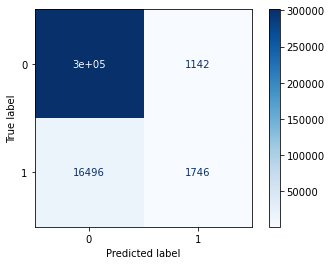

f1 : 0.1653
f3 : 0.1045
f5 : 0.0989
recall : 0.0957
negative predictive value : 0.9481
precision : 0.6046
roc_auc : 0.8118
training time : 28.41s
prediction time : 0.893s


In [15]:
m = Modelisation(X, y, RandomForestClassifier(n_estimators=100, n_jobs=-1))
m.show_conf_matrix()
m.show_metrics_score()

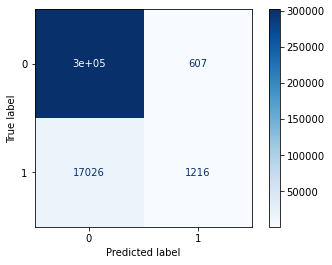

f1 : 0.1212
f3 : 0.0733
f5 : 0.0690
recall : 0.0667
negative predictive value : 0.9466
precision : 0.6670
roc_auc : 0.8340
training time : 27.498s
prediction time : 0.623s


In [16]:
m = Modelisation(X, y, RandomForestClassifier(min_samples_leaf=15, n_estimators=100, n_jobs=-1))
m.show_conf_matrix()
m.show_metrics_score()

## Tuning des hyperparamètres avec GridSearchCV

In [17]:
model = RandomForestClassifier()

cv_params = {
        'bootstrap': [False, True],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [50, 100, 200, 400, 600, 800, 1000, 1500],
        "class_weight": [None, 'balanced', {0:1, 1:2}, {0:1, 1:4}, {0:1, 1:8}, {0:1, 1:10}, {0:1, 1:12}, {0:1, 1:14}, {0:1, 1:16.5}, {0:1, 1:32}] 
}

scoring = {'recall': 'recall',
           'precision': 'precision',
           'f1': 'f1',
           'f3': make_scorer(fbeta_score, beta=3),
           'f5': make_scorer(fbeta_score, beta=5)
          }

print(len(ParameterGrid(cv_params)))

31680


In [18]:
# SearchCV(model, cv_params, data_frac=0.02, random=True, n_iter=5000, scoring=scoring, n_jobs=28, random_state=1234)

In [19]:
dico, results = restauration_CV('Forest_CV_Randomized5000_31680_0.02')

model : RandomForestClassifier()
model_name : Forest
type : RandomizedSearchCV
len_grid : 31680
n_iter : 5000
data_frac : 0.02
temps : 6h, 29min, 37.105s
n_jobs : 28
params : {'bootstrap': [False, True], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [50, 100, 200, 400, 600, 800, 1000, 1500], 'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 8}, {0: 1, 1: 10}, {0: 1, 1: 12}, {0: 1, 1: 14}, {0: 1, 1: 16.5}, {0: 1, 1: 32}]}
scoring : {'recall': 'recall', 'precision': 'precision', 'f1': 'f1', 'f3': make_scorer(fbeta_score, beta=3), 'f5': make_scorer(fbeta_score, beta=5)}


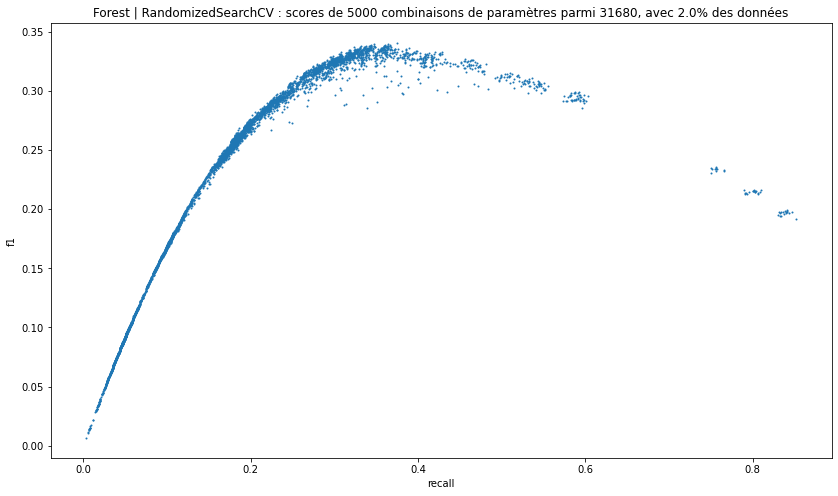

In [20]:
graph_2scores_CV(dico, results, 'recall', 'f1', s=1)

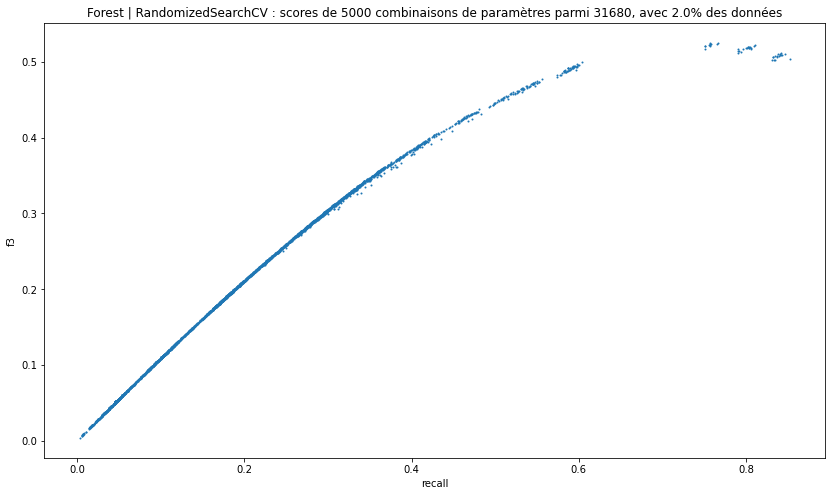

In [21]:
graph_2scores_CV(dico, results, 'recall', 'f3', s=1)

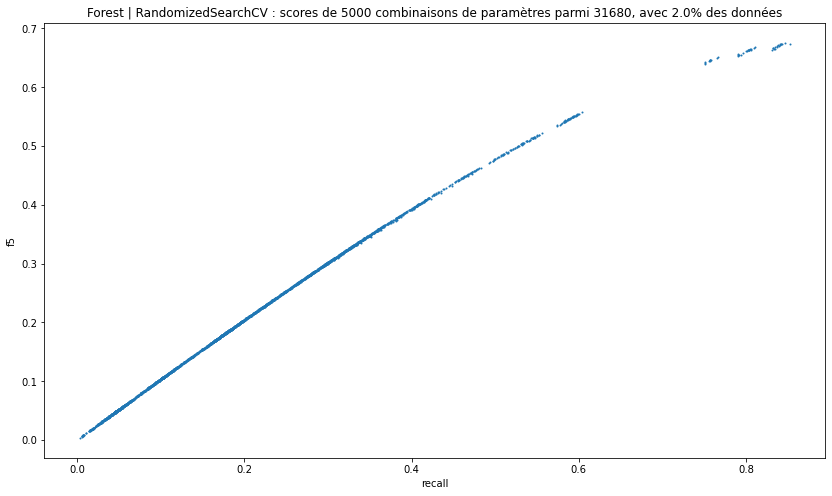

In [22]:
graph_2scores_CV(dico, results, 'recall', 'f5', s=1)

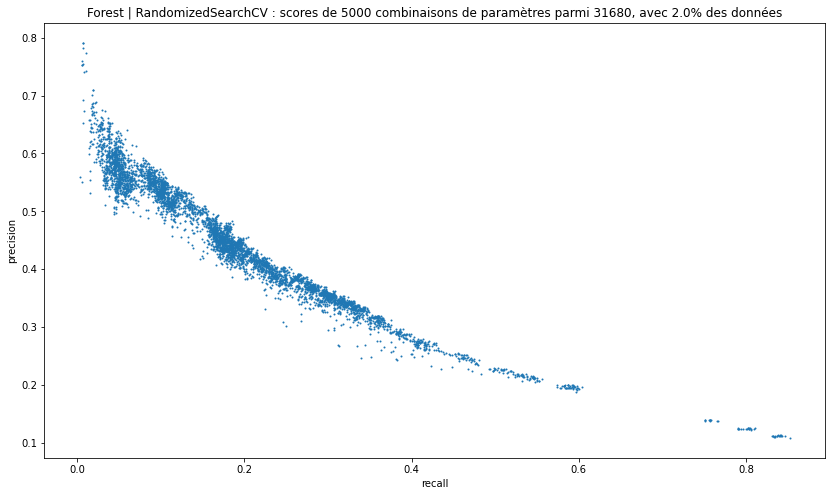

In [23]:
graph_2scores_CV(dico, results, 'recall', 'precision', s=1)

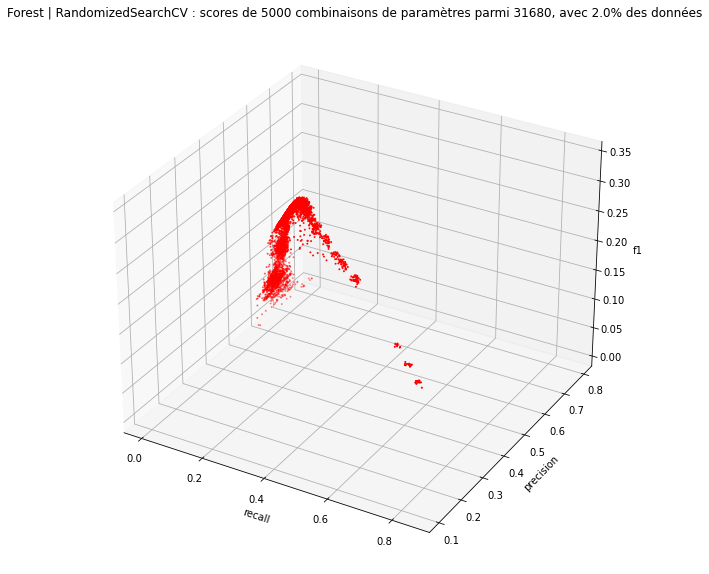

In [24]:
graph_3scores_CV(dico, results, 'recall', 'precision', 'f1', s=1)

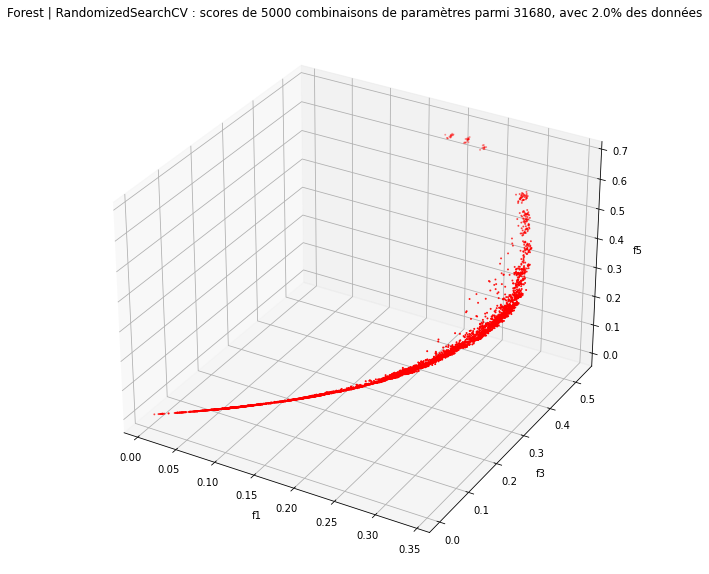

In [25]:
graph_3scores_CV(dico, results, 'f1', 'f3', 'f5', s=1)

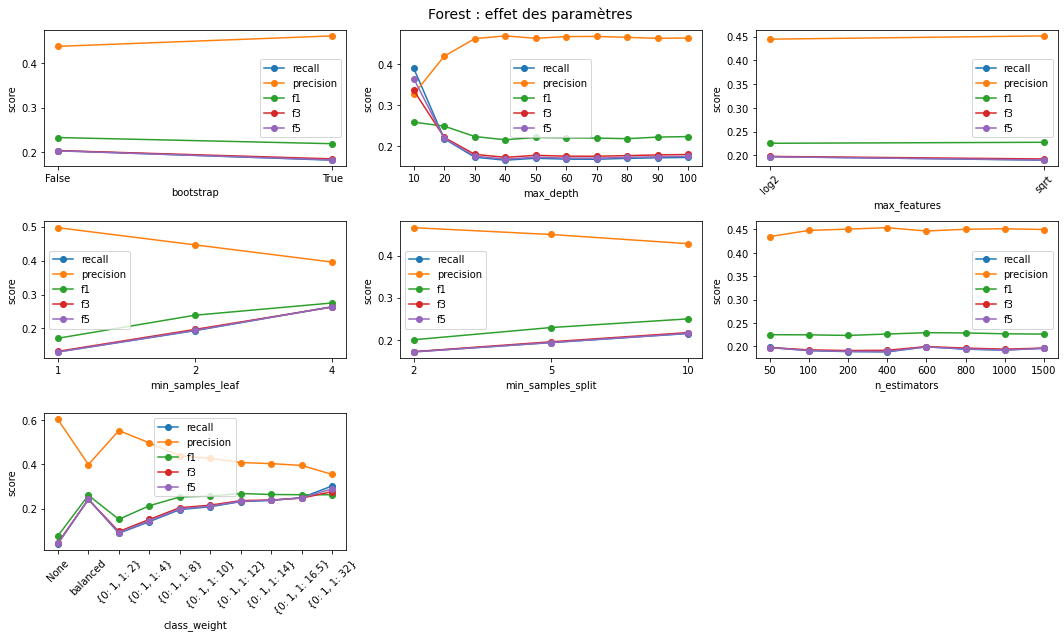

In [26]:
graph_param_CV(dico, results)

In [27]:
best_params = best_score_CV(dico, results, 'f3')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_class_weight,...,rank_test_precision,mean_test_f1,std_test_f1,rank_test_f1,mean_test_f3,std_test_f3,rank_test_f3,mean_test_f5,std_test_f5,rank_test_f5
1278,37.87703,0.357972,1.674242,0.03837,1500,2,4,sqrt,10,"{0: 1, 1: 32}",...,4963,0.232782,0.006456,2947,0.525351,0.015903,1,0.651352,0.021492,36
4550,37.798246,0.309513,1.707737,0.054846,1500,5,1,sqrt,10,"{0: 1, 1: 32}",...,4955,0.235862,0.006942,2908,0.524877,0.01791,2,0.64686,0.023929,38
1851,37.519424,0.112225,1.738546,0.060844,1500,5,4,sqrt,10,"{0: 1, 1: 32}",...,4964,0.231889,0.006234,2952,0.524234,0.016317,3,0.650447,0.022344,37
4703,2.512686,0.043452,0.130894,0.004717,100,2,2,sqrt,10,"{0: 1, 1: 32}",...,4960,0.234181,0.007708,2930,0.523611,0.016186,4,0.646613,0.020439,39
3475,37.643257,0.966817,1.658356,0.047024,1500,5,2,sqrt,10,"{0: 1, 1: 32}",...,4957,0.234484,0.007363,2927,0.523521,0.018484,5,0.64607,0.024305,40
2329,5.125927,0.083236,0.25046,0.015402,200,5,2,sqrt,10,"{0: 1, 1: 32}",...,4961,0.233668,0.006374,2938,0.522682,0.016647,6,0.645572,0.022574,41
1553,10.197965,0.16427,0.472824,0.007845,400,5,1,sqrt,10,"{0: 1, 1: 32}",...,4958,0.234162,0.007399,2931,0.522547,0.018297,7,0.644749,0.024139,43
990,1.810313,0.049651,0.077574,0.004073,50,2,2,sqrt,10,"{0: 1, 1: 32}",...,4968,0.215898,0.006817,3031,0.522405,0.012042,8,0.66848,0.014121,13
2527,38.272804,0.413294,1.72237,0.058261,1500,2,1,sqrt,10,"{0: 1, 1: 32}",...,4956,0.234922,0.006003,2921,0.521597,0.015597,9,0.642199,0.020971,44
1186,19.957523,0.193564,0.909535,0.034259,800,10,2,sqrt,10,"{0: 1, 1: 32}",...,4962,0.232378,0.006539,2948,0.521393,0.016688,10,0.644816,0.022402,42


Meilleure combinaison de paramètres pour f3 :


{'n_estimators': 1500,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'class_weight': {0: 1, 1: 32},
 'bootstrap': True}

In [28]:
best_params['n_estimators'] = 400

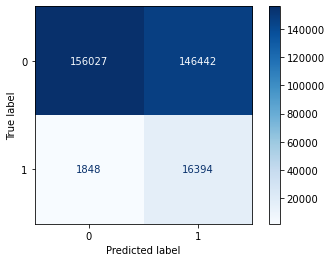

f1 : 0.1811
f3 : 0.5013
f5 : 0.6887
recall : 0.8987
negative predictive value : 0.9883
precision : 0.1007
roc_auc : 0.8246
training time : 1min, 2.376s
prediction time : 1.026s


In [29]:
m = Modelisation(X, y, RandomForestClassifier(**best_params, n_jobs=-1))
m.show_conf_matrix()
m.show_metrics_score()

In [30]:
print(f"Temps d'exécution total : {time.strftime('%H:%M:%S', time.gmtime(time.time()-t))}")

Temps d'exécution total : 00:04:04
